# Importing the necessary libraries that are required for Exploratory data analysis 

In [0]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

In [2]:
#importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns# data visualizations
sns.set()
sns.set(style = 'darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Now let's load the dataset that is been provied into the dataframe 

In [0]:
df=pd.read_excel("/content/Input Data Synthetic.xlsx")

In [4]:
# Display the top 10 records that are loaded into the dataframe from the dataset
df.head(10)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


In [5]:
# Display the information of the dataset (i.e total column index, column name, column Datatype,nullable objects if any)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [6]:
#Now lets check if any nullable objects are present in the dataset
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

Observation 1 : based on the above observation we can see that their are null values present in the columns 

*   8 rows in Short description 
*   1 row in Description

Now let proceed with the data cleaning and preprocessing in the further steps.

In [7]:
#Display the rows that are having null values in the dataset
df[df.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [0]:
#Now let's drop the caller column as it doesn't provide any significant information for our model building and then load changes to dataframe
data = df.drop(['Caller'], axis=1)

In [117]:
data.head()

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0


In [118]:
#Let's get the unique Assignment group values
data['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [119]:
#Let's drop the 
data.drop(data[data.isnull().any(axis=1)].index, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8491 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8491 non-null   object
 1   Description        8491 non-null   object
 2   Assignment group   8491 non-null   object
dtypes: object(3)
memory usage: 265.3+ KB


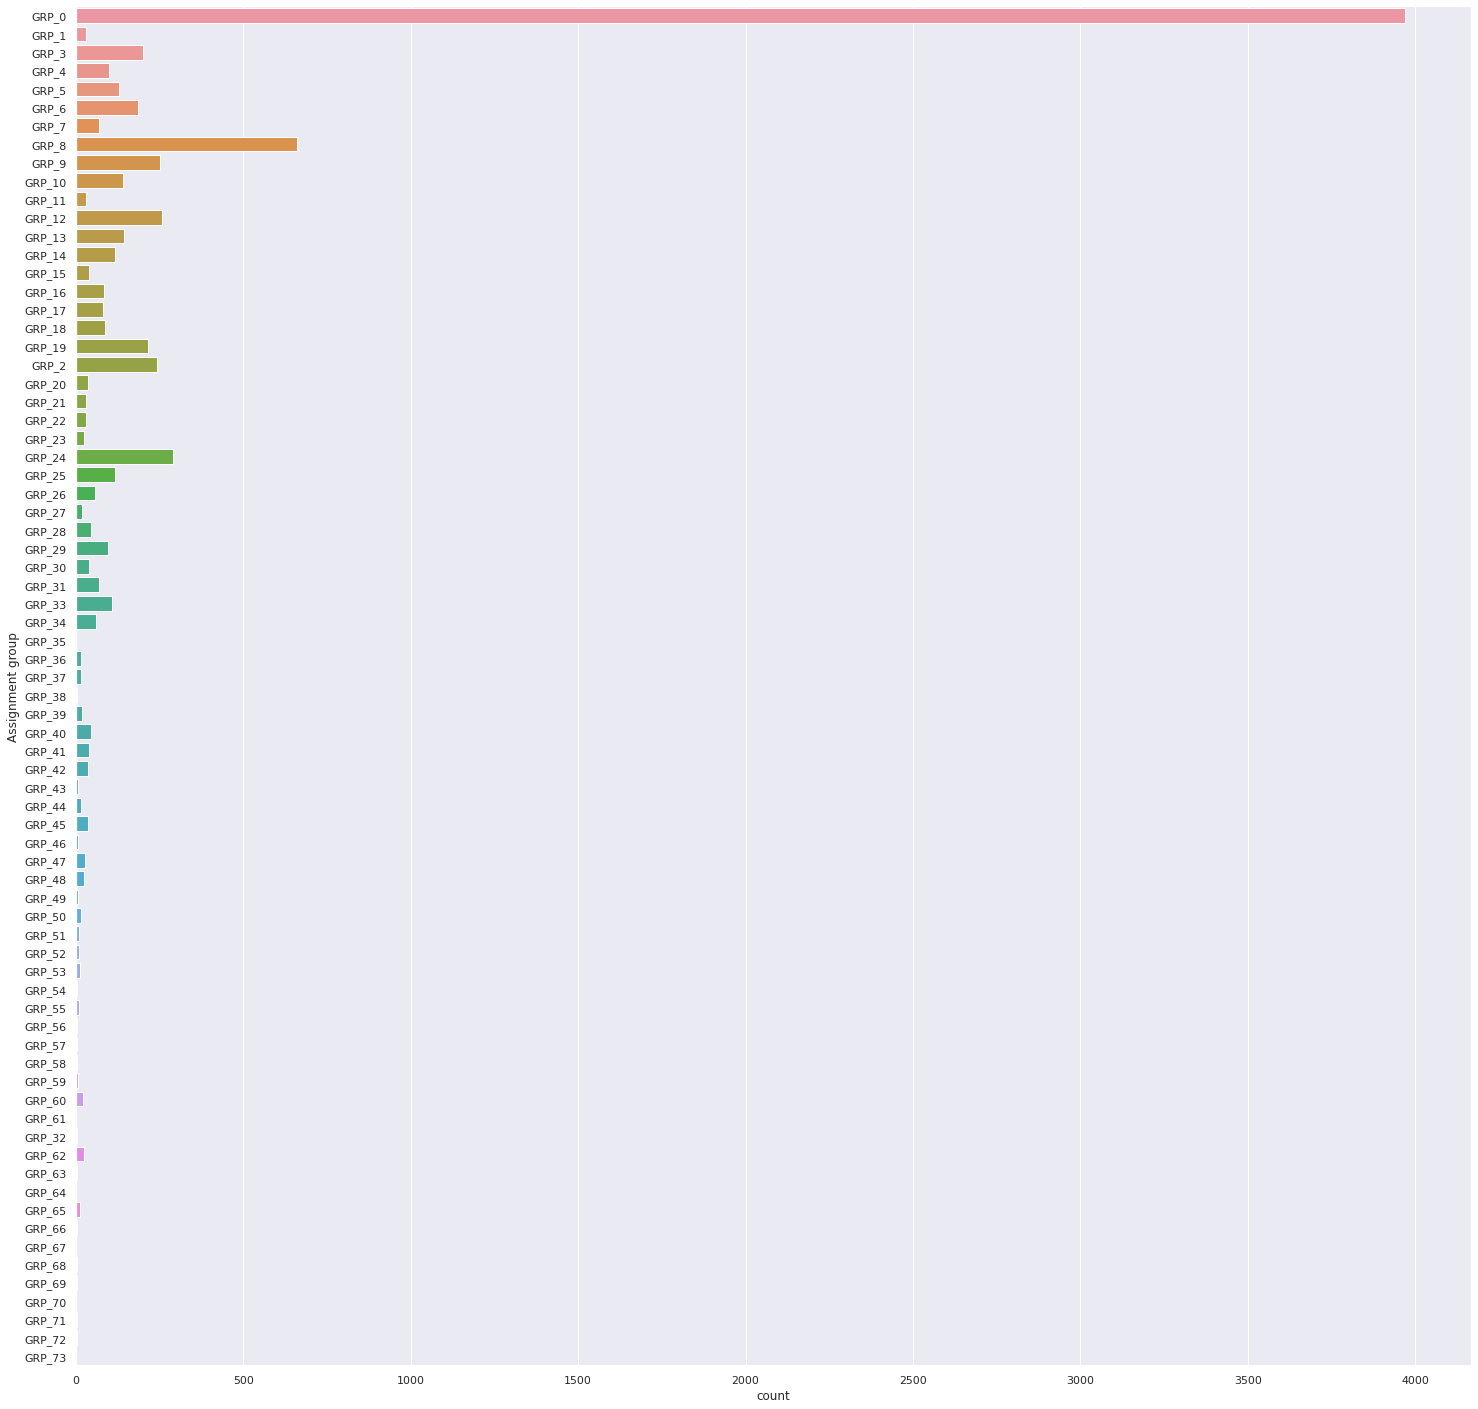

In [120]:
#Now let's plot the Assignment group after dropping the null values
group=data['Assignment group']
plt.figure(figsize=(25,25))
sns.countplot(y=group)
plt.show()

In [121]:
#Fetch wordcount for each entry in short description and Description columns
data['word_count_short_des'] = data['Short description'].apply(lambda x: len(str(x).split(" ")))
data['word_count_description'] = df['Description'].apply(lambda x: len(str(x).split(" ")))
data[['Short description','word_count_short_des','Description','word_count_description']].head()

,Short description,word_count_short_des,Description,word_count_description
0,login issue,2,-verified user details.(employee# & manager na...,29
1,outlook,1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,23
2,cant log in to vpn,5,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,9
3,unable to access hr_tool page,5,unable to access hr_tool page,5
4,skype error,3,skype error,3


Importing the necssary libraries for the Natural language processing and work with sentences

In [122]:
import string
import re
import nltk
nltk.download('wordnet') 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.probability import FreqDist
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize,WordPunctTokenizer,RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
data['CombinedDescription'] =  data['Short description'].str.cat(data['Description'], sep =" ")
data = data.drop(['Short description','Description'],axis = 1)

In [124]:
print(data.shape[0])
data.info()

8491
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8491 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Assignment group        8491 non-null   object
 1   word_count_short_des    8491 non-null   int64 
 2   word_count_description  8491 non-null   int64 
 3   CombinedDescription     8491 non-null   object
dtypes: int64(2), object(2)
memory usage: 651.7+ KB


In [0]:
data['CombinedDescription'] = data['CombinedDescription'].map(lambda x: word_tokenize(x))

In [0]:
stop_words = set(stopwords.words("english"))

In [0]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.VERB)

In [0]:
for index, row in data.iterrows():    
    columntext = str(data['CombinedDescription'][index])
    #Convert to lowercase
    text = columntext.lower()
    #Remove punctuations
    #job_scheduler at:
    text = re.sub('\S+@\S+','',text)
    text = text.replace("received from:","")
    text = re.sub('^(?=\d)(?:(?:(?:(?:(?:0?[13578]|1[02])(\/|-|\.)31)\1|(?:(?:0?[1,3-9]|1[0-2])(\/|-|\.)(?:29|30)\2))(?:(?:1[6-9]|[2-9]\d)?\d{2})|(?:0?2(\/|-|\.)29\3(?:(?:(?:1[6-9]|[2-9]\d)?(?:0[48]|[2468][048]|[13579][26])|(?:(?:16|[2468][048]|[3579][26])00))))|(?:(?:0?[1-9])|(?:1[0-2]))(\/|-|\.)(?:0?[1-9]|1\d|2[0-8])\4(?:(?:1[6-9]|[2-9]\d)?\d{2}))($|\ (?=\d)))?(((0?[1-9]|1[012])(:[0-5]\d){0,2}(\ [AP]M))|([01]\d|2[0-3])(:[0-5]\d){1,2})?$','',text)
    text = text.replace("job_scheduler at:","")
    text = text.translate(text.maketrans('', '', string.punctuation))    
    text = re.sub('[^a-zA-Z0-9\s]', ' ', text)
    
    #remove tags
    text=re.sub("&lt;/?.:-_*?&gt;@"," &lt;&gt; ",text)
    
    #remove spaces
    text = text.strip()

    #word tokenization    
    text=word_tokenize(text)
    text = " ".join(text)
    ##Convert to list from string
    text = text.split()
    
    #remove of the stop words
    text = [word for word in text if not word in stop_words]

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word, get_wordnet_pos(word)) for word in text] 
    text = " ".join(text)
    data['CombinedDescription'][index]=str(text)

In [129]:
data['word_count_combined_desc'] = data['CombinedDescription'].apply(lambda x: len(str(x).split(" ")))
data.head(50)

,Assignment group,word_count_short_des,word_count_description,CombinedDescription,word_count_combined_desc
0,GRP_0,2,29,login issue verify user detail employee manage...,24
1,GRP_0,1,23,outlook receive hmjdrvpbkomuaywn gmailcom hell...,17
2,GRP_0,5,9,cant log vpn receive eylqgodmybqkwiam gmailcom...,10
3,GRP_0,5,5,unable access hrtool page unable access hrtool...,8
4,GRP_0,3,3,skype error skype error,4
5,GRP_0,9,9,unable log engineering tool skype unable log e...,10
6,GRP_1,10,11,event critical hostname221companycom value mou...,16
7,GRP_0,9,9,ticketno1550391 employment status new nonemplo...,16
8,GRP_0,7,7,unable disable add in outlook unable disable a...,10
9,GRP_0,4,4,ticket update inplant874773 ticket update inpl...,6


In [130]:
data.word_count_combined_desc.describe()

count    8491.000000
mean       24.684136
std        54.636983
min         1.000000
25%         9.000000
50%        15.000000
75%        25.000000
max      1652.000000
Name: word_count_combined_desc, dtype: float64

In [131]:
data=data[['Assignment group','CombinedDescription']]

data.head()

,Assignment group,CombinedDescription
0,GRP_0,login issue verify user detail employee manage...
1,GRP_0,outlook receive hmjdrvpbkomuaywn gmailcom hell...
2,GRP_0,cant log vpn receive eylqgodmybqkwiam gmailcom...
3,GRP_0,unable access hrtool page unable access hrtool...
4,GRP_0,skype error skype error


In [0]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stop_words,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

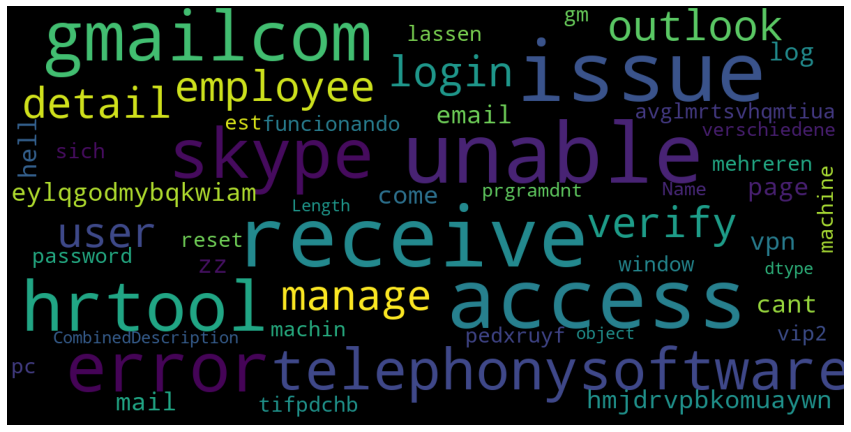

In [133]:
show_wordcloud(data['CombinedDescription'])

In [134]:
text = str(data['CombinedDescription'])
fdist = FreqDist()
for word in word_tokenize(text):
    fdist[word.lower()] += 1
fdist.most_common(50)

[('...', 9),
 ('issue', 3),
 ('receive', 3),
 ('unable', 3),
 ('access', 3),
 (':', 3),
 ('gmailcom', 2),
 ('hrtool', 2),
 ('skype', 2),
 ('error', 2),
 ('telephonysoftware', 2),
 (',', 2),
 ('0', 1),
 ('login', 1),
 ('verify', 1),
 ('user', 1),
 ('detail', 1),
 ('employee', 1),
 ('manage', 1),
 ('1', 1),
 ('outlook', 1),
 ('hmjdrvpbkomuaywn', 1),
 ('hell', 1),
 ('2', 1),
 ('cant', 1),
 ('log', 1),
 ('vpn', 1),
 ('eylqgodmybqkwiam', 1),
 ('3', 1),
 ('page', 1),
 ('4', 1),
 ('8495', 1),
 ('email', 1),
 ('come', 1),
 ('zz', 1),
 ('mail', 1),
 ('avglmrtsvhqmtiua', 1),
 ('gm', 1),
 ('8496', 1),
 ('8497', 1),
 ('vip2', 1),
 ('window', 1),
 ('password', 1),
 ('reset', 1),
 ('tifpdchb', 1),
 ('pedxruyf', 1),
 ('v', 1),
 ('8498', 1),
 ('machine', 1),
 ('n', 1)]

In [135]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Target'. 
data['Assignment group']= label_encoder.fit_transform(data['Assignment group'].values) 
  
data['Assignment group'].unique()

array([ 0,  1, 23, 34, 45, 56, 67, 72, 73,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 28,
       29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 26, 59, 60, 61, 62, 63, 64,
       65, 66, 68, 69, 70, 71])

## Model Building

In [0]:
#importing libraries for model building
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

In [0]:
#defining the parameters for mode
max_features = 1000
maxlen = 1522
embedding_size = 200

In [0]:
tokenizer = Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(data['CombinedDescription'].values)

In [139]:
X = tokenizer.texts_to_sequences(data['CombinedDescription'].values)
X = pad_sequences(X)
y = np.asarray(data['Assignment group']).reshape(-1,1)
print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 8491
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   

In [140]:
word_index = tokenizer.word_index
print(word_index)
num_words = min(max_features, len(word_index))
print(num_words)

{'receive': 1, 'password': 2, 'gmailcom': 3, 'please': 4, 'job': 5, 'erp': 6, 'jobscheduler': 7, 'fail': 8, 'user': 9, 'yesnona': 10, 'reset': 11, 'issue': 12, 'unable': 13, 'account': 14, 'work': 15, 'companycom': 16, 'access': 17, 'error': 18, 'company': 19, 'email': 20, 'need': 21, 'monitoringtool': 22, 'outlook': 23, 'ticket': 24, 'login': 25, 'site': 26, 'help': 27, 'get': 28, 'system': 29, 'name': 30, 'update': 31, 'sid34': 32, 'lock': 33, 'power': 34, 'use': 35, 'id': 36, '1': 37, 'hello': 38, 'circuit': 39, 'change': 40, 'network': 41, 'event': 42, 'connect': 43, 'window': 44, 'call': 45, 'see': 46, 'server': 47, 'request': 48, 'new': 49, 'message': 50, '2': 51, 'log': 52, 'backup': 53, 'able': 54, 'skype': 55, 'vpn': 56, 'printer': 57, 'cid': 58, 'try': 59, 'crm': 60, 'outage': 61, 'start': 62, 'time': 63, 'problem': 64, 'device': 65, 'open': 66, 'number': 67, 'nt': 68, 'customer': 69, 'order': 70, 'team': 71, 'et': 72, 'contact': 73, 'hi': 74, 'pc': 75, 'type': 76, 'check': 7

Glove Embedding

In [0]:
glove_file = "/content/drive/My Drive/glove.6B.zip"

In [0]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [0]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    # print(embd.dtype)
    embeddings[word] = embd

In [144]:
embedding_matrix = np.zeros((num_words, 200))
labels = []
for word, i in tokenizer.word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        labels.append(word)
len(embeddings.values())

400001

In [0]:
from sklearn.manifold import TSNE
def tsne():
 
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(embedding_matrix[:200])
    print(new_values.shape)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20,20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

(200, 2)


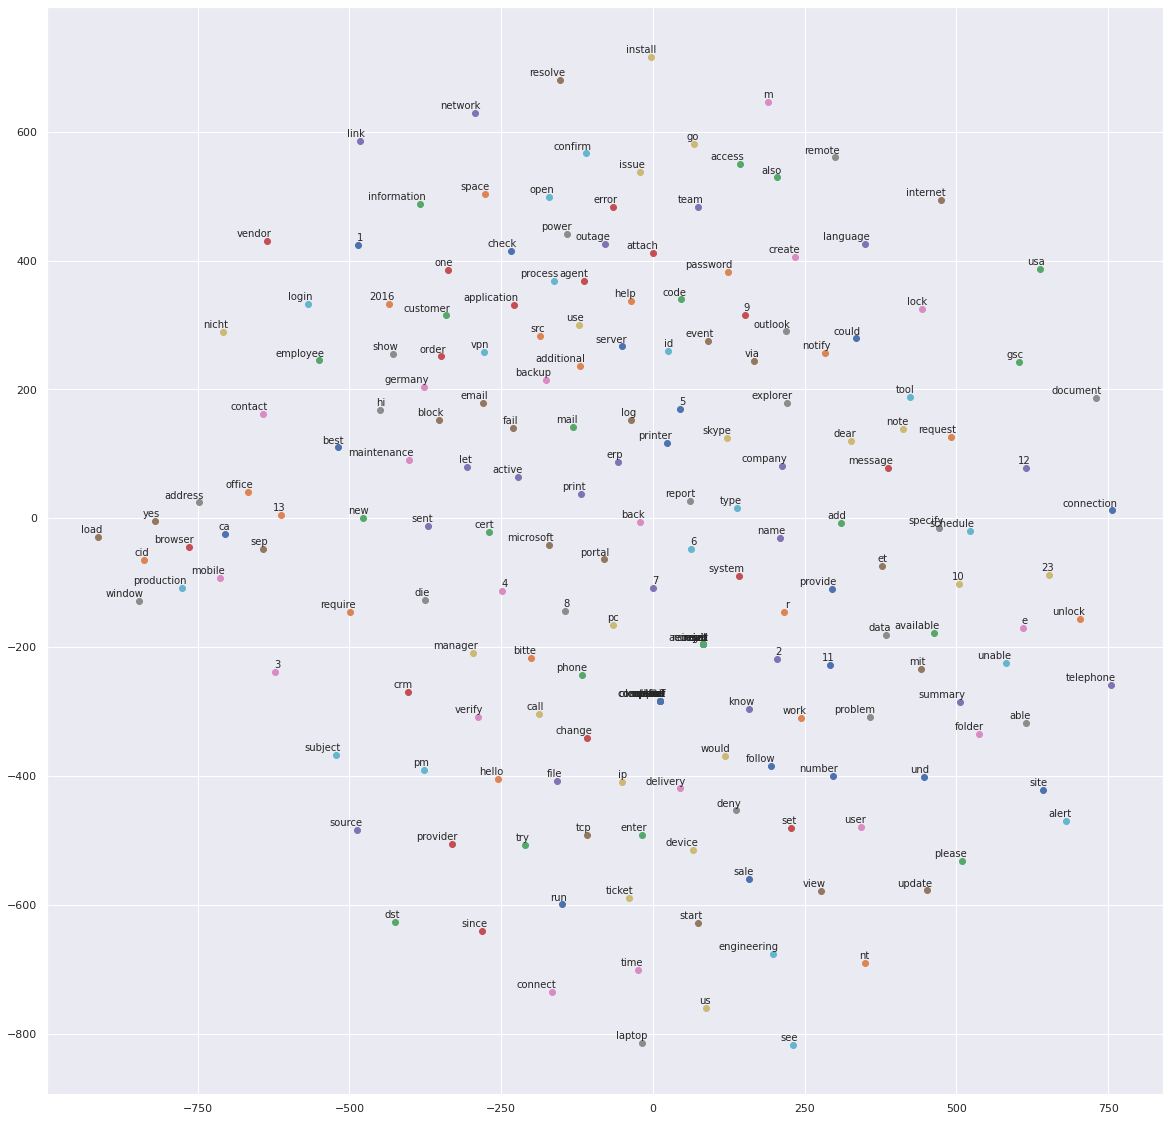

In [159]:
tsne()


Model creating and compling

In [0]:
from sklearn.model_selection  import train_test_split
#Splitting training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [0]:
model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model.add(LSTM(128, return_sequences = True))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
batch_size = 120
epochs = 3
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2,verbose=2)